In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
X = np.load('X.npy')
y = np.load('y.npy')

Label: 0.0


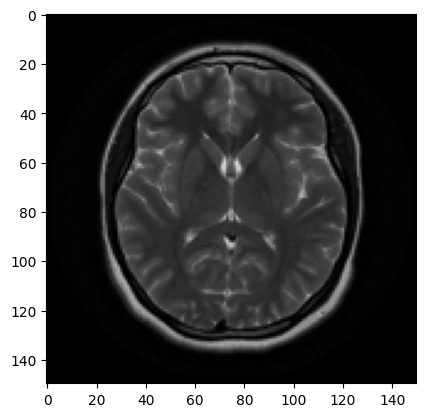

In [9]:
from sklearn.model_selection import train_test_split
plt.imshow(X[0])
print(f'Label: {y[0]}')
plt.show()
X = X.astype('float32') / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [11]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
score = model.evaluate(X_test, y_test)
print(f'Accuracy: {score[1]}')
model.save('model.h5')

Epoch 1/10
5/5 [==============================] - 3s 347ms/step - loss: 1.5025 - accuracy: 0.4768 - val_loss: 0.7585 - val_accuracy: 0.5789
Epoch 2/10
5/5 [==============================] - 2s 317ms/step - loss: 0.7709 - accuracy: 0.6026 - val_loss: 0.5736 - val_accuracy: 0.5789
Epoch 3/10
5/5 [==============================] - 1s 300ms/step - loss: 0.6124 - accuracy: 0.7219 - val_loss: 0.5774 - val_accuracy: 0.8684
Epoch 4/10
5/5 [==============================] - 2s 312ms/step - loss: 0.5534 - accuracy: 0.7947 - val_loss: 0.4244 - val_accuracy: 0.8158
Epoch 5/10
5/5 [==============================] - 2s 331ms/step - loss: 0.4772 - accuracy: 0.7815 - val_loss: 0.4001 - val_accuracy: 0.7895
Epoch 6/10
5/5 [==============================] - 2s 336ms/step - loss: 0.3666 - accuracy: 0.8477 - val_loss: 0.3547 - val_accuracy: 0.8158
Epoch 7/10
5/5 [==============================] - 2s 342ms/step - loss: 0.2560 - accuracy: 0.9272 - val_loss: 0.3207 - val_accuracy: 0.8158
Epoch 8/10
5/5 [====

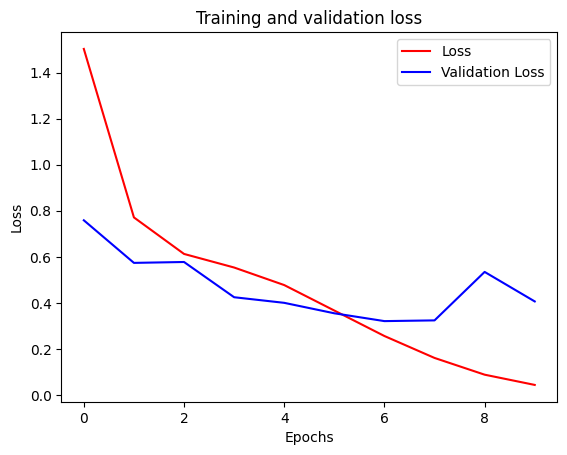

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =[i for i in range(10)]
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

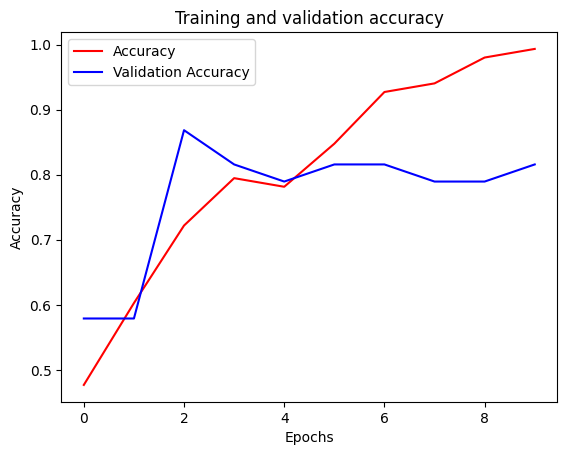

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()